<a href="https://colab.research.google.com/github/Atchiya2004/Atchi/blob/master/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [12]:
# Load dataset
df = pd.read_csv("AI_Crop_Yield_Dataset_100_Rows.csv")
df.head()

,Year,Crop,Rainfall(mm),Temperature(C),Humidity(%),Soil_pH,Nitrogen(mg/kg),Phosphorus(mg/kg),Potassium(mg/kg),Yield(kg/ha)
0,2022,Rice,780.68,25.38,68.30,7.92,222.93,37.31,215.03,1763.26
1,2023,Wheat,736.35,23.95,47.93,7.22,183.59,109.33,87.28,1693.22
2,2021,Wheat,923.19,28.97,46.01,7.59,237.48,129.78,97.14,1817.59
3,2023,Rice,542.47,29.37,57.09,7.67,278.29,117.45,176.75,1837.03
4,2023,Rice,519.71,32.69,44.59,7.60,196.29,23.96,231.57,1652.62


In [31]:
#check for missing values
print(df.isnull().sum())
df=df.dropna()

Year                 0
Crop                 0
Rainfall(mm)         0
Temperature(C)       0
Humidity(%)          0
Soil_pH              0
Nitrogen(mg/kg)      0
Phosphorus(mg/kg)    0
Potassium(mg/kg)     0
Yield(kg/ha)         0
dtype: int64


In [32]:
df.shape

(100, 10)

In [30]:
# Features and Target
X = df[['Rainfall(mm)', 'Temperature(C)', 'Humidity(%)', 'Soil_pH',
        'Nitrogen(mg/kg)', 'Phosphorus(mg/kg)', 'Potassium(mg/kg)']]
y = df['Yield(kg/ha)']
X
y

,Yield(kg/ha)
0,1763.26
1,1693.22
2,1817.59
3,1837.03
4,1652.62
...,...
95,1906.93
96,1796.28
97,2064.71
98,1820.52


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predict
y_pred = model.predict(X_test)

In [17]:
# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [18]:
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f} kg/ha")
print(f"RMSE: {rmse:.2f} kg/ha")

R² Score: 0.5713
MAE: 88.94 kg/ha
RMSE: 101.69 kg/ha


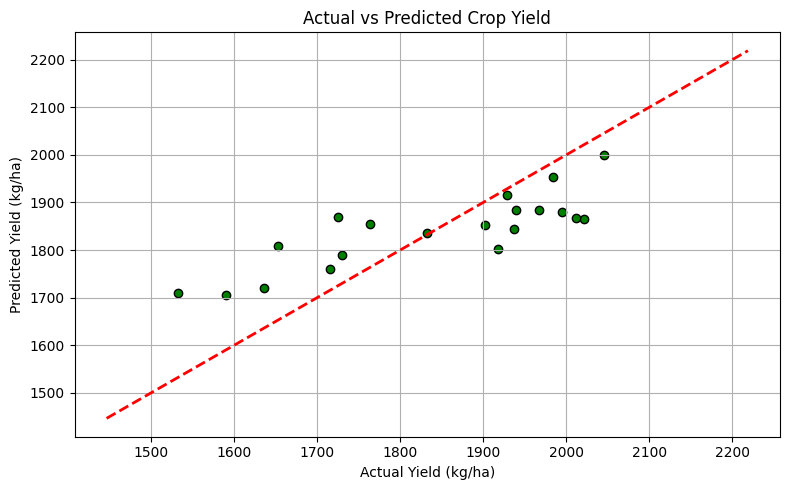

In [19]:
# Plot Actual vs Predicted Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Yield (kg/ha)")
plt.ylabel("Predicted Yield (kg/ha)")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.tight_layout()
plt.show()

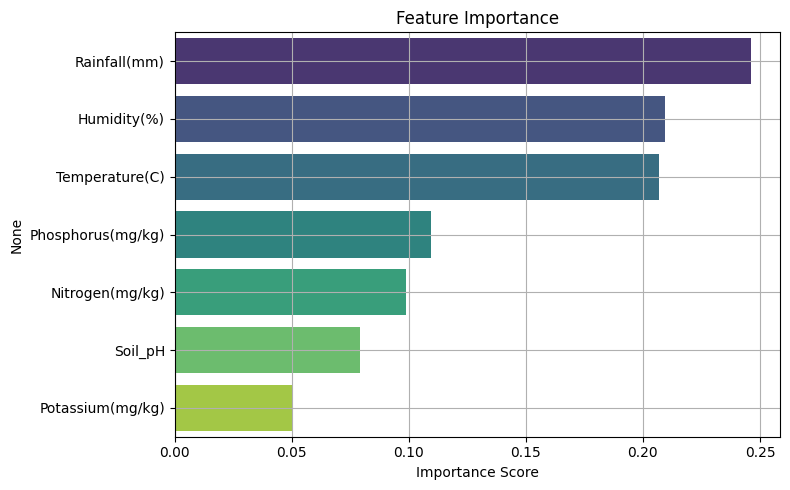

In [25]:
#Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index,hue=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


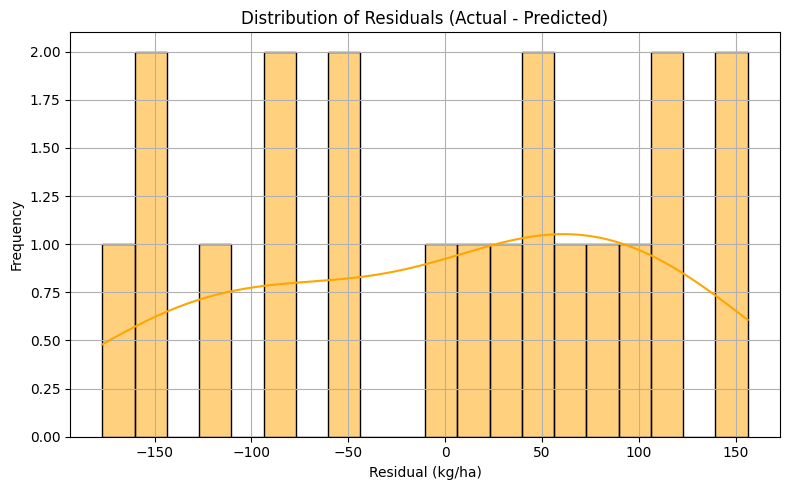

In [27]:
#Error Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual (kg/ha)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Actual vs Predicted Table
comparison_df = pd.DataFrame({'Actual Yield (kg/ha)': y_test.values,
                              'Predicted Yield (kg/ha)': y_pred.round(2)})
print("\nComparison Table (Top 10):\n", comparison_df.head(10))


Comparison Table (Top 10):
    Actual Yield (kg/ha)  Predicted Yield (kg/ha)
0               1902.31                  1853.16
1               1928.37                  1915.01
2               1966.80                  1884.17
3               1590.97                  1704.77
4               1533.08                  1710.05
5               1937.61                  1844.41
6               1832.01                  1836.10
7               1636.33                  1721.26
8               1984.59                  1954.23
9               1763.26                  1853.94


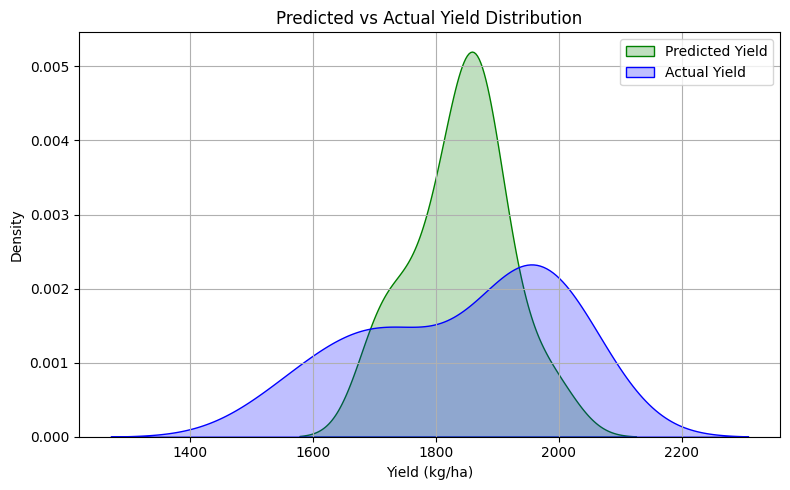

In [29]:
# Yield Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(y_pred, label='Predicted Yield', fill=True, color='green')
sns.kdeplot(y_test, label='Actual Yield', fill=True, color='blue')
plt.title("Predicted vs Actual Yield Distribution")
plt.xlabel("Yield (kg/ha)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()